# @WeRateDogs Twitter Data Wrangling¶


In [503]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from IPython.display import Image

# Gathering Data

### 1.  Archive file

In [3]:
#load the archive csv file to a dataframe
archive_df=pd.read_csv('twitter-archive-enhanced.csv')

### 2. Prediction file


First, download the file image-predictions.tsv file programatically

In [344]:
predictions_url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename=predictions_url.split('/')[-1]
response= requests.get(predictions_url)
#write response content to disk only if response 200 OK rceived
if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
else:
    print('Couldfilename not download file response code  {} received'.format(response.status_code))



 Then load the file into a a new dataframe

In [240]:
predictions_df = pd.read_csv('image-predictions.tsv',sep='\t')

In [241]:
# confirming
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. Twitter File

In [ ]:


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [401]:
# print one json object to check contetnts
with open('tweet-json.txt','r',encoding='utf-8') as jfile:  
    for jline in jfile:
        jobject=json.loads(jline)
        print (json.dumps(jobject, indent = 2))
        break

{
  "created_at": "Tue Aug 01 16:23:56 +0000 2017",
  "id": 892420643555336193,
  "id_str": "892420643555336193",
  "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  "truncated": false,
  "display_text_range": [
    0,
    85
  ],
  "entities": {
    "hashtags": [],
    "symbols": [],
    "user_mentions": [],
    "urls": [],
    "media": [
      {
        "id": 892420639486877696,
        "id_str": "892420639486877696",
        "indices": [
          86,
          109
        ],
        "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg",
        "url": "https://t.co/MgUWQ76dJU",
        "display_url": "pic.twitter.com/MgUWQ76dJU",
        "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1",
        "type": "photo",
        "sizes": {
          "large": {
            "w": 540,
            "h":

In [403]:
json_df_list=[]
with open('tweet-json.txt','r',encoding='utf-8') as jfile:  
    for jline in jfile:
        
        jobjectdict=json.loads(jline)
        
        json_df_list.append(jobjectdict)
        

json_df=pd.DataFrame(json_df_list)


In [404]:
#confirm data frame was create correctly
json_df.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN


In [400]:
"""
json_df_list=[]
with open('tweet-json.txt','r',encoding='utf-8') as jfile:  
    for jline in jfile:
        
        jobjectdict=json.loads(jline)
        tweet_id=jobjectdict['id']
        retweet_count=jobjectdict['retweet_count']
        favorite_count=jobjectdict['favorite_count']
        is_favorited = jobjectdict['favorited']
        is_retweeted = jobjectdict['retweeted']
        json_df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count,
                             'is_favorited':is_favorited, 'is_retweeted':is_retweeted
                            })
        

json_df=pd.DataFrame(json_df_list)
#confirm data frame was create correctly
json_df.head(2)
"""

"\njson_df_list=[]\nwith open('tweet-json.txt','r',encoding='utf-8') as jfile:  \n    for jline in jfile:\n        \n        jobjectdict=json.loads(jline)\n        tweet_id=jobjectdict['id']\n        retweet_count=jobjectdict['retweet_count']\n        favorite_count=jobjectdict['favorite_count']\n        is_favorited = jobjectdict['favorited']\n        is_retweeted = jobjectdict['retweeted']\n        json_df_list.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count,\n                             'is_favorited':is_favorited, 'is_retweeted':is_retweeted\n                            })\n        \n\njson_df=pd.DataFrame(json_df_list)\n#confirm data frame was create correctly\njson_df.head(2)\n"

# Assessment

## 1- visual assessment

### archive_df

In [348]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


#### 2- Predictions

In [349]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### 3- JSON  file

In [405]:
json_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","{'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg',

### Programatically

#### 1- archive_df

In [16]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [369]:
#check which tweets has null  expanded_urls 
archive_df[archive_df.expanded_urls.isnull()] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [372]:
#check for completence of dog stage


(archive_df.doggo + archive_df.floofer + archive_df.pupper + archive_df.puppo).value_counts()


NoneNoneNoneNone        1976
NoneNonepupperNone      245 
doggoNoneNoneNone       83  
NoneNoneNonepuppo       29  
doggoNonepupperNone     12  
NoneflooferNoneNone     9   
doggoflooferNoneNone    1   
doggoNoneNonepuppo      1   
dtype: int64

In [373]:
# check for rating_denominator correctense
archive_df.rating_denominator.value_counts()


10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [390]:
pd.set_option('display.max_colwidth', -1)
archive_df[archive_df.rating_denominator !=10][['text','rating_denominator']]

<ipython-input-390-83fd03f9d665>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,text,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50


In [375]:
# find if there is duplicated url
archive_df.expanded_urls.duplicated().sum()

137

In [376]:
# list the duplicated url
archive_df[archive_df.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6",NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sierra. She's one precious pupper. Absolute 12/10. Been in and out of ICU her whole life. Help Sierra below\n\nhttps://t.co/Xp01EU3qyD https://t.co/V5lkvrGLdQ,NaN,NaN,NaN,"https://www.gofundme.com/help-my-baby-sierra-get-better,https://twitter.com/dog_rates/status/873213775632977920/photo/1,https://twitter.com/dog_rates/status/873213775632977920/photo/1",12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timison. He just told an awful joke but is still hanging on to the hope that you'll laugh with him. 10/10 https://t.co/s2yYuHabWl,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792070062081/photo/1,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://t.co/h9R0EwKd9X,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164079423490/photo/1,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10 https://t.co/0DvHAMdA4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269671505920/photo/1,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After much debate this dog is being upgraded to 10/10. I repeat 10/10,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


### 2- predictions_df

In [410]:
predictions_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [409]:
#Check if p1_conf is always the highest
max_conf=predictions_df[['p1_conf','p3_conf','p3_conf']].max(1)
# conferming that max_conf is always postive
print ("min of max confedence" ,max_conf.min())
# checking if p1_conf is alwyas the heighest
(max_conf - predictions_df.p1_conf).sum()

min of max confedence 0.0443334


0.0

In [378]:
# find duplicate tweet id
predictions_df.tweet_id.duplicated().sum()

0

In [379]:
#check if there are duplicate url
predictions_df.jpg_url.duplicated().sum()


66

In [380]:
# dispaly th duplicate url
predictions_df[predictions_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


### 3- json_df

In [593]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2353 non-null   object 
 1   id                             2353 non-null   int64  
 2   id_str                         2353 non-null   object 
 3   full_text                      2353 non-null   object 
 4   truncated                      2353 non-null   bool   
 5   display_text_range             2353 non-null   object 
 6   entities                       2353 non-null   object 
 7   extended_entities              2072 non-null   object 
 8   source                         2353 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [417]:
#Check for duplicates id

json_df.id.duplicated().sum()

0

In [429]:
json_df.id.duplicated().value_counts()

False    2353
Name: id, dtype: int64

In [432]:
print(json_df.possibly_sensitive.sum())
json_df.possibly_sensitive_appealable.sum()

0


0

# Quality
- ##  archive_df
   - tweet id , in_reply_to_status_id and in_reply_to_user_id should be string
   - some rating_denominator values other than 10
   - some dogs with no dog stage
   - some dogs with 2 dog stage
       -  12 doggo and pupper
       -  1  doggo and puppo
       -  1 doggo and floofer
   - null values represeted as the string "None" in multiple colomns (doggo,floofer,pupper,puppo)
- ## predictions_df
    - tweet_id sould be string
    - p1, p2 , p3  columns names are not describtive enough
    - p1_conf (the confedence level for p1) is always the heighst , I will use this value only for analysis, 
       the 2 other values are not needed
- ## json_df
    - possibly_sensitive_appealable and possibly_sensitive are string, it should be boolean
    


## Tidiness
- ##  archive_df
  - one variable in 4 columns: doggo, floofer , pupper ,  puppo  should be one colomn
  - multiple dog predictions available in different columns.
  -  id , in_reply_to_status_id  and in_reply_to_user_id are all duplicated  in the json_df
  - all three tables should be combined
  

# Cleaning

In [ ]:
cleaned_archive_df=archive_df.copy()
cleaned_predictions_df = predictions_df.copy()
cleaned_json_df=json_df.copy()

### Define

 Remove unwanted retweets by removing rows where in_reply_to_status_id or retweeted_status_id  is not NaN

### Code

In [381]:
cleaned_archive_df=cleaned_archive_df[cleaned_archive_df.in_reply_to_status_id.isnull() & archive_df.retweeted_status_id.isnull()]

### Test

In [434]:
#Confirming

cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Define 

convert tweet_id type from int to str

### Code

In [464]:
cleaned_archive_df.tweet_id = cleaned_archive_df.tweet_id.apply(str)

C:\Users\msaad\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Test

In [463]:
cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###  Define

Merge the colomn for the dog stage into one and  remove the old colomns

according to the provided definition 'doggo ,pupper' can be assigned 'puppo'

'doggof,loofer' is just a gggo  and doggo puppo can be considered as puppo

### Code

In [385]:
### merge dogo, floofer, pupper, puppo
import numpy as np



doggo = cleaned_archive_df.doggo.replace('None','')
floofer = cleaned_archive_df.floofer.replace('None','')
pupper = cleaned_archive_df.pupper.replace('None','')
puppo = cleaned_archive_df.puppo.replace('None','')

cleaned_archive_df.dog_stage = doggo + floofer + pupper + puppo

# manual cleaning of datawith muliple dog stages
cleaned_archive_df.dog_stage = cleaned_archive_df.dog_stage.str.replace("doggopupper", 'puppo')
cleaned_archive_df.dog_stage = cleaned_archive_df.dog_stage.str.replace("doggofloofer", 'doggo')
cleaned_archive_df.dog_stage = cleaned_archive_df.dog_stage.str.replace("doggopuppo",'puppo')
cleaned_archive_df.dog_stage = cleaned_archive_df.dog_stage.replace("",np.nan)


C:\Users\msaad\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Testing

In [387]:
cleaned_archive_df.dog_stage.value_counts()

pupper     221
doggo      73 
puppo      33 
floofer    9  
Name: dog_stage, dtype: int64

### Define

Remove the colomns that are not needed after removing retweets/replay and merging dog stages into one

####  Code

In [229]:
cleaned_archive_df = cleaned_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                              'retweeted_status_user_id', 'retweeted_status_timestamp','name','doggo',
                                              'floofer','pupper','puppo'], axis=1)

####   Test

In [206]:
cleaned_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   dog_stage           336 non-null    object
dtypes: int64(3), object(5)
memory usage: 147.4+ KB


### Define

Prediction p1 is always higher, so I am going to use it and drop the other 2 prediction, 
hence columns 'p2','p2_conf','p2_dog','p3','p3_conf','p3_dog' will be dropped and remove non dogs photos

###  code

In [478]:

cleaned_predictions_df = cleaned_predictions_df.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1)

cleaned_predictions_df = cleaned_predictions_df[cleaned_predictions_df.p1_dog == True]



### Test

In [475]:
cleaned_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 73.3+ KB


### Define

Rename columns names for 'p1','p1_conf','p1_dog' to more desciptive name and convert tweet_id to string

### Code

In [479]:
cleaned_predictions_df.rename(columns={'p1': 'dog_breed', 'p1_conf': 'prediction_confedence', 'p1_dog': 'is_dog'}, inplace=True)
cleaned_predictions_df.tweet_id = cleaned_predictions_df.tweet_id.apply(str)

### Test

In [480]:
cleaned_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1532 non-null   object 
 1   jpg_url                1532 non-null   object 
 2   img_num                1532 non-null   int64  
 3   dog_breed              1532 non-null   object 
 4   prediction_confedence  1532 non-null   float64
 5   is_dog                 1532 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 73.3+ KB


### Twitter json file

In [448]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2353 non-null   object 
 1   id                             2353 non-null   int64  
 2   id_str                         2353 non-null   object 
 3   full_text                      2353 non-null   object 
 4   truncated                      2353 non-null   bool   
 5   display_text_range             2353 non-null   object 
 6   entities                       2353 non-null   object 
 7   extended_entities              2072 non-null   object 
 8   source                         2353 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Define

Remove retweets and replies where in_reply_to_status_id is not null 

### Code

In [451]:
cleaned_json_df = cleaned_json_df[cleaned_json_df.in_reply_to_status_id.isnull()]

### Test

In [453]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2352
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2275 non-null   object 
 1   id                             2275 non-null   int64  
 2   id_str                         2275 non-null   object 
 3   full_text                      2275 non-null   object 
 4   truncated                      2275 non-null   bool   
 5   display_text_range             2275 non-null   object 
 6   entities                       2275 non-null   object 
 7   extended_entities              2049 non-null   object 
 8   source                         2275 non-null   object 
 9   in_reply_to_status_id          0 non-null      float64
 10  in_reply_to_status_id_str      0 non-null      object 
 11  in_reply_to_user_id            0 non-null      float64
 12  in_reply_to_user_id_str        0 non-null      o

### Define

3 columns of interest has been identifies, id_str , retweet_count , favorite_coun, all other columns will be dropped
and rename 'id_str' to 'tweet_id' to match the other tables

### Code

In [460]:
cleaned_json_df=cleaned_json_df[['id_str','retweet_count','favorite_count']]
cleaned_json_df.rename(columns={'id_str': 'tweet_id'}, inplace=True)


### Test

In [461]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2275 non-null   object
 1   retweet_count   2275 non-null   int64 
 2   favorite_count  2275 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 71.1+ KB


### Define

Joining all tables as one table

In [484]:
cleaned_json_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2275 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2275 non-null   object
 1   retweet_count   2275 non-null   int64 
 2   favorite_count  2275 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 71.1+ KB


#### Code

In [485]:
super_df = pd.merge(cleaned_archive_df,cleaned_predictions_df ,on='tweet_id', how='inner')
super_df = pd.merge(super_df, cleaned_json_df,on='tweet_id', how='inner')

In [486]:
super_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1462 entries, 0 to 1461
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1462 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1462 non-null   object 
 4   source                      1462 non-null   object 
 5   text                        1462 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1462 non-null   object 
 10  rating_numerator            1462 non-null   int64  
 11  rating_denominator          1462 non-null   int64  
 12  name                        1462 non-null   object 
 13  doggo                       1462 

## Storing

In [519]:
super_df.to_csv('twitter_archive_master.csv')

# Insights and Visualization

## insight 1,  Top  Favorite Tweets

Top 10 Favorite Tweet

In [546]:
Top_10_fav = super_df.sort_values(['favorite_count'], ascending =False ).head(10)[['tweet_id', 'text', 
                                                                      'rating_numerator',
                                                                      'rating_denominator',
                                                                      'dog_breed','retweet_count',
                                                                      'favorite_count']]
Top_10_fav

,tweet_id,text,rating_numerator,rating_denominator,dog_breed,retweet_count,favorite_count
246,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,Lakeland_terrier,48265,132810
613,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,Labrador_retriever,79515,131075
50,879415818425184262,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,10,English_springer,45849,107956
323,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,10,Chihuahua,56625,107015
94,866450705531457537,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,10,French_bulldog,32883,106827
266,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,10,standard_poodle,42228,95450
81,870374049280663552,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,13,10,golden_retriever,27680,85011
638,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,10,Eskimo_dog,52360,75163
212,830583320585068544,This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,13,10,Labrador_retriever,19297,73397
55,877736472329191424,This is Aja. She was just told she's a good dog. Suspicions confirmed. 13/10 would tell again https://t.co/lsPyyAiF1r,13,10,Chesapeake_Bay_retriever,17300,71144


### The most Favorite tweet

In [578]:
super_df.text[super_df.tweet_id == Top_10_fav.iloc[0]['tweet_id']].iloc[0]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

The image attached to the most Favorite tweet

In [592]:
Image(url= super_df.jpg_url[super_df.tweet_id == Top_10_fav.iloc[0]['tweet_id']].iloc[0],width=600)

### insight 2, Top 10  retweeted 

In [520]:
super_df.sort_values(['retweet_count'], ascending =False ).head(10)[['tweet_id', 'text', 
                                                                      'rating_numerator',
                                                                      'rating_denominator',
                                                                      'dog_breed','retweet_count',
                                                                      'favorite_count']]

,tweet_id,text,rating_numerator,rating_denominator,dog_breed,retweet_count,favorite_count
613,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,Labrador_retriever,79515,131075
323,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,13,10,Chihuahua,56625,107015
638,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,13,10,Eskimo_dog,52360,75163
246,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,Lakeland_terrier,48265,132810
50,879415818425184262,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,13,10,English_springer,45849,107956
266,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,14,10,standard_poodle,42228,95450
94,866450705531457537,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",13,10,French_bulldog,32883,106827
271,817827839487737858,This is Buddy. He ran into a glass door once. Now he's h*ckin skeptical. 13/10 empowering af (vid by Brittany Gaunt) https://t.co/q2BgNIi3OA,13,10,cocker_spaniel,31314,57622
364,795464331001561088,Elder doggo does a splash. Both 13/10 incredible stuff https://t.co/gBUDjdEcqz,13,10,golden_retriever,27728,55683
81,870374049280663552,This is Zoey. She really likes the planet. Would hate to see willful ignorance and the denial of fairly elemental science destroy it. 13/10 https://t.co/T1xlgaPujm,13,10,golden_retriever,27680,85011


## insight 3, Dog Stages distribution

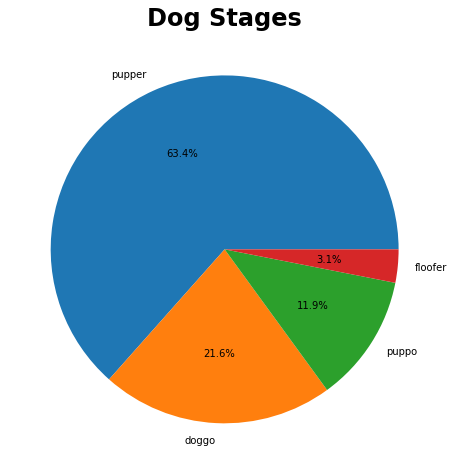

In [580]:
super_df.dog_stage.value_counts().plot(kind='pie',autopct='%.1f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Dog Stages', weight='bold', fontsize=24);


### From the above pie chart we can conclude that most of the share photos are for pupper with share of 63.4% while the floofer comes last with share of 3.1%

### Insight 4, Most tweeted dog breeds images


golden_retriever      137
Labrador_retriever    94 
Name: dog_breed, dtype: int64


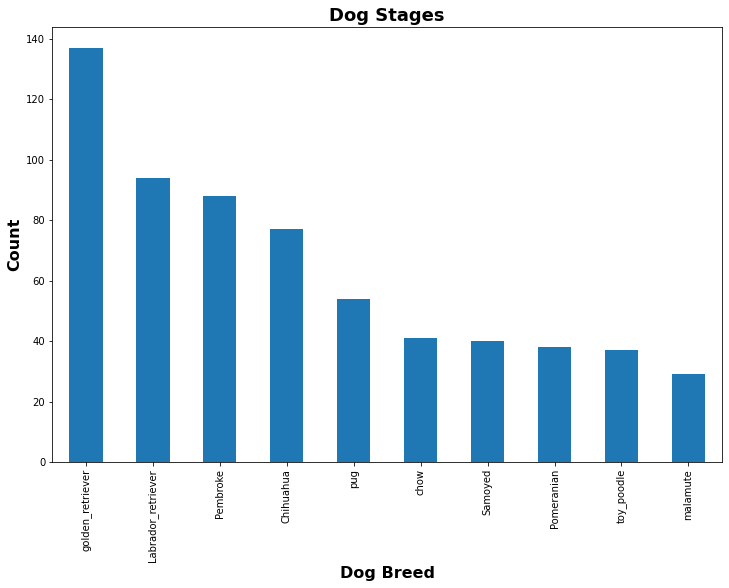

In [584]:
tweets_per_breed = super_df.dog_breed.value_counts()
print(tweets_per_breed.head(2))

tweets_per_breed.head(10).plot(kind='bar', figsize=(12,8))
plt.xlabel('Dog Breed', weight='bold', fontsize=16)
plt.ylabel('Count', weight='bold', fontsize=16)
plt.title('Dog Stages', weight='bold', fontsize=18);


### The above chart shows the top 10 tweeted dog breed, the golden retriever is the most tweed one (137 times)